# Sales Analysis

#### Import Necessary Libraries

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt

#### Merging 12 months of sales data into a single file

In [142]:
# own attempt

pd.read_csv('./Sales_Data/Sales_April_2019.csv')

import os, glob
all_files = glob.glob(os.path.join('./Sales_Data/', "Sales_*.csv"))
# print(all_files)
# os.getcwd()

df_from_each_file = (pd.read_csv(f, sep=',') for f in all_files)
# print(df_merged)
df_merged   = pd.concat(df_from_each_file, ignore_index=True)
df_merged.to_csv( "merged.csv", index=False)

print(len(pd.read_csv('merged.csv')))
pd.read_csv('merged.csv').head()

186850


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [143]:
# following video

df = pd.read_csv('./Sales_Data/Sales_April_2019.csv')
df.head()

files = [file for file in os.listdir('./Sales_Data')]
# print(files)

all_months_data = pd.DataFrame()
# print(all_months_data)

for file in files:
    df = pd.read_csv('./Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data, df])
#     print(all_months_data)
    
all_months_data.to_csv('all_data.csv', index=False)

# check
all_data = pd.read_csv('all_data.csv')
print(len(all_data))
all_data.head()

186850


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean up the data!

#### Drop rows of NAN

In [183]:
## checking to make sure the nan is actually empty rows
# all rows with nan
nan_df = all_data[all_data.isna().any(axis=1)]
print(nan_df)
# comparing to rows with nan under qty ordered only
test2 = all_data[all_data['Quantity Ordered'].isna()]
print(test2)

print('----------')

# removing the nan rows
all_data = all_data.dropna(how='all')
# new_df[new_df['Quantity Ordered'].isna()]
all_data.count

       Order ID Product Quantity Ordered Price Each Order Date  \
1           NaN     NaN              NaN        NaN        NaN   
356         NaN     NaN              NaN        NaN        NaN   
735         NaN     NaN              NaN        NaN        NaN   
1433        NaN     NaN              NaN        NaN        NaN   
1553        NaN     NaN              NaN        NaN        NaN   
...         ...     ...              ...        ...        ...   
185176      NaN     NaN              NaN        NaN        NaN   
185438      NaN     NaN              NaN        NaN        NaN   
186042      NaN     NaN              NaN        NaN        NaN   
186548      NaN     NaN              NaN        NaN        NaN   
186826      NaN     NaN              NaN        NaN        NaN   

       Purchase Address Order Month  
1                   NaN         NaN  
356                 NaN         NaN  
735                 NaN         NaN  
1433                NaN         NaN  
1553             

<bound method DataFrame.count of        Order ID                     Product Quantity Ordered Price Each  \
0        176558        USB-C Charging Cable                2      11.95   
2        176559  Bose SoundSport Headphones                1      99.99   
3        176560                Google Phone                1        600   
4        176560            Wired Headphones                1      11.99   
5        176561            Wired Headphones                1      11.99   
...         ...                         ...              ...        ...   
186845   259353      AAA Batteries (4-pack)                3       2.99   
186846   259354                      iPhone                1        700   
186847   259355                      iPhone                1        700   
186848   259356      34in Ultrawide Monitor                1     379.99   
186849   259357        USB-C Charging Cable                1      11.95   

            Order Date                         Purchase Address Or

#### Find 'Or' and delete it

In [203]:
import re
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
# print(temp_df)
all_data.count
all_data.head()
# temp_df.count
# all_data.drop("^Or")

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


#### Convert columns to the correct type

In [237]:
## keith recommended .to_numeric...says it's more stable or just better for pandas in general
# all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
# all_data['Price Each'] = all_data['Price Each'].astype(float)
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

<ipython-input-237-2daf669d7cfa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
<ipython-input-237-2daf669d7cfa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])


### Augment data with additional columns

### Task 2: Add Month Column

In [239]:
# len(all_data['Price Each'])
# all_data.insert(5, "Order Month", ['Test']*len(all_data['Price Each']))
all_data['Order Month'] = np.NaN
all_data.head()



<ipython-input-239-93542612b018>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Order Month'] = np.NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Total Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",NaN,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",NaN,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",NaN,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",NaN,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",NaN,11.99


In [240]:
# IMPORTANT: without .str below, we wouldn't access the data within the cell, instead it would look at only rows 0:2 in Order Date
all_data['Order Month'] = all_data['Order Date'].str[0:2].astype('int32')
# print(all_data[all_data['Order Month'] == 'Or'])
# all_data['']
# all_data['Order Month'].astype(float)
all_data.head()

<ipython-input-240-d5d59e739401>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Order Month'] = all_data['Order Date'].str[0:2].astype('int32')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Total Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Task 3: Add a sales column

In [242]:
all_data['Total Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

<ipython-input-242-026d6ee1c16b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Total Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Total Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Question 1: What was the best month for sales? How much was earned that month?

In [280]:
# own attempt

sales_data = all_data.groupby('Order Month', as_index=False).sum()
sales_data.head()

,Order Month,Quantity Ordered,Price Each,Total Sales
0,1,10903,1.811768e+06,1.822257e+06
1,2,13449,2.188885e+06,2.202022e+06
2,3,17005,2.791208e+06,2.807100e+06
3,4,20558,3.367671e+06,3.390670e+06
4,5,18667,3.135125e+06,3.152607e+06


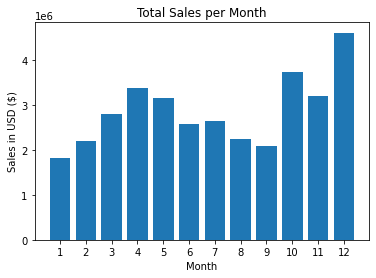

In [283]:
import matplotlib.pyplot as plt

plt.title('Total Sales per Month')
plt.xlabel('Month')
plt.ylabel('Sales in USD ($)')
plt.xticks(np.arange(0, 13, step=1))
plt.bar(sales_data['Order Month'], sales_data['Total Sales'])
plt.show()

#### Question 2: What city had the highest number of sales?

#### Task 4: Add a city column

In [326]:
# my solution
# all_data['City'] = all_data['Purchase Address'].str.split(', ').str[1]
# all_data.head()



# keith's way of doing it using .apply
def get_city(address):
    return f"{address.split(', ')[1]}, {address.split(', ')[2].split(' ')[0]}"

# all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(', ')[1] + ', ' + x.split(', ')[2].split(' ')[0])
all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x))
all_data.head()

<ipython-input-326-ba9d12d95eef>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Total Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"


In [327]:
city_data = all_data.groupby('City', as_index=False).sum()
city_data.head()

,City,Quantity Ordered,Price Each,Order Month,Total Sales
0,"Atlanta, GA",16602,2.779908e+06,104794,2.795499e+06
1,"Austin, TX",11153,1.809874e+06,69829,1.819582e+06
2,"Boston, MA",22528,3.637410e+06,141112,3.661642e+06
3,"Dallas, TX",16730,2.752628e+06,104620,2.767975e+06
4,"Los Angeles, CA",33289,5.421435e+06,208325,5.452571e+06


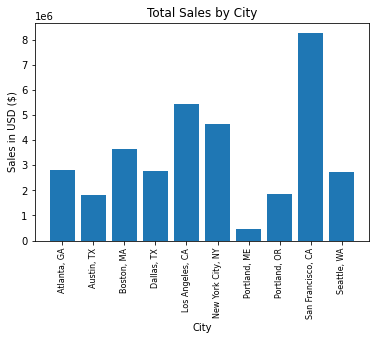

In [329]:
plt.title('Total Sales by City')
plt.xlabel('City')
plt.xticks(rotation=90, size=8)
plt.ylabel('Sales in USD ($)')
plt.bar(city_data['City'], city_data['Total Sales'])
plt.show()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [408]:
# def get_time(order_date):
#     return order_date.split(' ')[1]
# all_data['Order Time'] = all_data['Order Date'].apply(lambda x: get_time(x))
# all_data.head()

# # below using datetime
# import datetime
# def convert_time(order_date):
#     return datetime.datetime.strptime(order_date, '%m/%d/%y %H:%M')
# if all_data['Order Date'].dtypes != '<M8[ns]':
#     all_data['Order Date'] = all_data['Order Date'].apply(lambda x: convert_time(x))

# all_data['Order Hour'] = all_data['Order Date'].apply(lambda x: x.time().hour)
# all_data.head()

# below without using datetime
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data['Order Hour'] = all_data['Order Date'].dt.hour
all_data['Order Minute'] = all_data['Order Date'].dt.minute
all_data.head()

sales_by_hour = all_data.groupby('Order Hour', as_index=False).count()
sales_by_hour.tail()

<ipython-input-408-878d9e7310dd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
<ipython-input-408-878d9e7310dd>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Order Hour'] = all_data['Order Date'].dt.hour
<ipython-input-408-878d9e7310dd>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

,Order Hour,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Total Sales,City,Order Time,Order Minute
19,19,12905,12905,12905,12905,12905,12905,12905,12905,12905,12905,12905
20,20,12228,12228,12228,12228,12228,12228,12228,12228,12228,12228,12228
21,21,10921,10921,10921,10921,10921,10921,10921,10921,10921,10921,10921
22,22,8822,8822,8822,8822,8822,8822,8822,8822,8822,8822,8822
23,23,6275,6275,6275,6275,6275,6275,6275,6275,6275,6275,6275


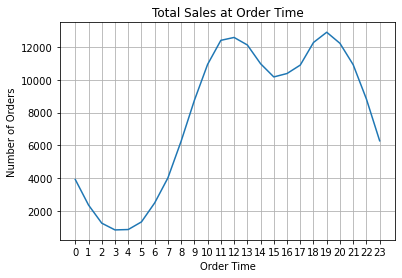

In [415]:
plt.title('Total Sales at Order Time')
plt.xlabel('Order H')
plt.ylabel('Number of Orders')
plt.xticks(np.arange(0, 24, step=1))
plt.grid()
plt.plot(sales_by_hour['Order Hour'], sales_by_hour['Order ID'])
plt.show()